<a href="https://colab.research.google.com/github/bozkurtmert0/deeplearning/blob/master/CNN_Small_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Colab icin dogrulamayi yapiyoruz**





In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

Kaggle ile baglani kuruyoruz

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mertbozkurt5","key":"8c1597c0d6b361978953515203c6d9fe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Kaggle uzerinden datamizi indiriyoruz**

In [ ]:
!kaggle competitions download -c dogs-vs-cats 

 96% 521M/543M [00:04<00:00, 149MB/s]
100% 543M/543M [00:04<00:00, 133MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 90.7MB/s]
 92% 250M/271M [00:03<00:00, 74.3MB/s]
100% 271M/271M [00:03<00:00, 73.3MB/s]


**Datamizi klasore cikartiyoruz**

In [ ]:
import zipfile
#zip_ref = zipfile.ZipFile('/content/test1.zip', 'r')
zip_ref = zipfile.ZipFile('/content/train.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

**Datamizi kullanacagimiz sekilde ayirma islemi yapiyoruz. Tum data yerine ufak bir kismini kullanacagiz**

In [ ]:
import os , shutil

# orjinal datanın bulunduğu yolu belirtiyoruz
original_dataset_dir = "/content/files/train"

#kucuk datasetimiz icin bir yol belirledik
base_dir = '/content/files/data'
os.mkdir(base_dir)

# eğitim, test ve dogrulama seti ıcın yer ayarladık
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# kediler için eğitim setimizin geleceği yer
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# köpekler için eğitim seti
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# kediler için doğrulama seti
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# köpekler için doğrulama seti
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# kediler icin test seti
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# köpekler için test seti
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# ilk 1000 kedi fotoğrafını train_cats_dir dizine ekledik
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# sonraki 500 kedi fotoğrafını dogrulama setı icin validation_cats_dir dizisine ekeledik
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# sonraki 500 fotoğrafı test test_cats_dir dizisine ekledik
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 1000 köpek fotosunu ekledik train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# sonraki 500 köpek fotosunu  validation_dogs_dir ekledik
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 köpek fotosunu test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('Toplam kedi eğitim verisi:', len(os.listdir(train_cats_dir)))
print('Toplam kedi test verisi:', len(os.listdir(test_cats_dir)))
print('Toplam kedi doğrulama verisi:', len(os.listdir(validation_cats_dir)))
print('Toplam köpek eğitim verisi:', len(os.listdir(train_dogs_dir)))
print('Toplam köpek test verisi:', len(os.listdir(test_dogs_dir)))
print('Toplam köpek doğrulama verisi:', len(os.listdir(validation_dogs_dir)))

Toplam kedi eğitim verisi: 1000
Toplam kedi test verisi: 500
Toplam kedi doğrulama verisi: 500
Toplam köpek eğitim verisi: 1000
Toplam köpek test verisi: 500
Toplam köpek doğrulama verisi: 500


**Agimizi olusturalim**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

Gorece karmasik bir problemle ugrasacagimiz icin buyuk bir ag insa edecegiz.
Yeni katmanlar eklemek agin kapasitesini arttirmak ve Flatten katmanina ogrenebileceginden cok daha fazla nitelik haritasi gondermemek adina boyutunu kucultmek icindir.

Elimizdeki probnlem ikili siniflandirma oldugu icin agin sonunda tek bir birim (Dense katmani 1 birimli) ve sigmoid aktivasyon fonksiyonu var .Bu tek birim agin bir sinifa atadigi olasiligi kodlayacak

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Agimizi inceleyelim**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Fotograflarimizi aga sunabilecegimiz sekilde yeniden duzenliyelim**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tum fotograflari 1./255 seklinde olceklendirdik yani 0 ile 1 arsinda degerlere
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # hedef
        train_dir,
        # tum fotograflari 150x150 boyutuna getirdik
        target_size=(150, 150),
        batch_size=20,
        #binary_crossentropy loss kulandıgınımız icin ikili etiketler gerekiyor
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Modelimizi egitimine baslatalim**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100, #uretece kac defa yigin alinacagini 'defa grdyan inisi algoritmasi calisacagini ve ne zaman diger epooa baslanacagini belirler'
      epochs=30,
      validation_data=validation_generator,#dogrulama icin kac defa yigin alinacagini belirler
      validation_steps=50
      )

Epoch 1/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6391 - accuracy: 0.6420 - val_loss: 0.6005 - val_accuracy: 0.6680
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5917 - accuracy: 0.7115 - val_loss: 0.6437 - val_accuracy: 0.6280
Epoch 3/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5394 - accuracy: 0.7370 - val_loss: 0.6463 - val_accuracy: 0.6870
Epoch 4/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4829 - accuracy: 0.7710 - val_loss: 0.6062 - val_accuracy: 0.6940
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4366 - accuracy: 0.7950 - val_loss: 0.6392 - val_accuracy: 0.7240
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.3604 - accuracy: 0.8340 - val_loss: 0.6119 - val_accuracy: 0.7140
Epoch 7/30
100/100 [==============================] - 9s 92ms/step - loss: 0.2971 - accuracy: 0.8695 - val_loss: 1.3547 - val_accuracy: 0.6490

**Modelimizi kaydedelim ve grafigini cizdirerek basarimini inceleyelim**

In [ ]:
 model.save('/content/drive/My Drive/DeepL/Modeller/cats_and_dogs_small.h5')

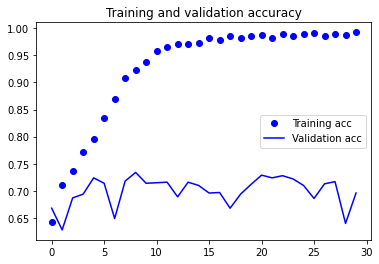

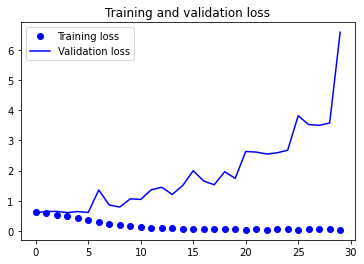

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Bu sekliller asiri uydurmanin gostergesidir .Egitim basarisi artarak %100 ulasirken ,dogrulama basarisi%72 de takilip kaliyor. Modelimiz ogrenmiyor verilen verileri ezberliyor.

## Veri Arttrima

Az miktarda verimiz oldugundan ,ayni fotograflari cesitli islemlerle degistirip modele tekrar sunmamizdir. Amac ayni fotografi modelin tekrar gormemesi ve ezberlememesidir.Modelimiz daha fazla oruntu arar ve daha iyi bir genellestirme yakalayacaktir. Kersta bulunan ImageDataGenerator ile baslayabiliriz.

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40, #resmin rastgele dondurme acisi
      width_shift_range=0.2, # resmin yatay ve dikeyde dokaydirma orani
      height_shift_range=0.2, #..
      shear_range=0.2, #burkma islemi
      zoom_range=0.2, #yakinlasma islemi
      horizontal_flip=True, #dikeyde resimi dondurme 
      fill_mode='nearest') #islemlerde ortaya cikacak fazla goruntu noktalarinin nasil dolrulacagini belirler

Ornek olarak bir goruntuyu nasil bir sekilde yaptigina bakalim

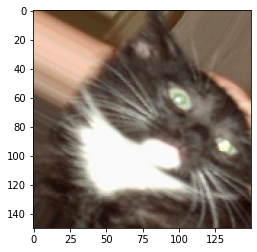

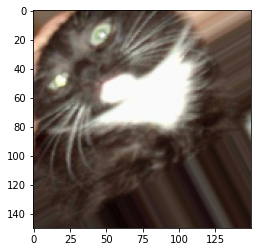

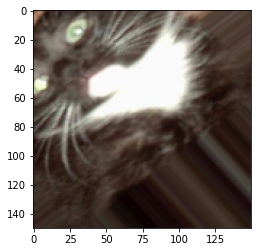

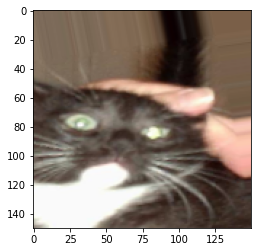

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# cesitlendirecegimiz resmi sectik
img_path = fnames[6]

# resmi okuyup yeniden boyutlandirdik
img = image.load_img(img_path, target_size=(150, 150))

# resmi numpy dizisine cevirdik (150, 150, 3)
x = image.img_to_array(img)

# sekline getirdik (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# rastgele donusturulmus resim yiginlari olusturur.
#sionsuz dongude olmamasi icin bir yerde durdurmamiz gerekli
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


Simdi verimizi nasil hangi parametrelerle cesitlendirecegimize goz atalim

In [ ]:
# Veri Cesitlendirme icin tanimlamayi yaptik ve parametreleri yazdik
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#dogrulama seti cesitlendirlmeyecek o yuzde sadece bouytlandirma paramteresibni giriyoruz
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # hedef data
        train_dir,
        # tuym resimler yeniden bouytlandirilacak
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels   ikili siniflandirma...
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Modelimize iletim sonumu (dropout)ekleyelim

In [ ]:
#Iletim sonumu ekleyelim
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #******************
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Modelimizi tekrar egitelim**
Daha iyi bri sonuc icin epoch sayisini arttiralim

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=150,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/150
100/100 [==============================] - 18s 184ms/step - loss: 0.6966 - accuracy: 0.4985 - val_loss: 0.6837 - val_accuracy: 0.5230
Epoch 2/150
100/100 [==============================] - 18s 183ms/step - loss: 0.6862 - accuracy: 0.5440 - val_loss: 0.6766 - val_accuracy: 0.5490
Epoch 3/150
100/100 [==============================] - 18s 184ms/step - loss: 0.6814 - accuracy: 0.5575 - val_loss: 0.7283 - val_accuracy: 0.5010
Epoch 4/150
100/100 [==============================] - 18s 180ms/step - loss: 0.6709 - accuracy: 0.5805 - val_loss: 0.6596 - val_accuracy: 0.5970
Epoch 5/150
100/100 [==============================] - 18s 182ms/step - loss: 0.6589 - accuracy: 0.5985 - val_loss: 0.6467 - val_accuracy: 0.6090
Epoch 6/150
100/100 [==============================] - 18s 181ms/step - loss: 0.6496 - accuracy: 0.6275 - val_loss: 0.6390 - val_accuracy: 0.6270
Epoch 7/150
100/100 [==============================] - 18s 181ms/step - loss: 0.6436 - accuracy: 0.6280 - val_loss: 0.6317 -

Tekrar kaydedelim

In [ ]:
 model.save('/content/drive/My Drive/DeepL/Modeller/cats_and_dogs_small2.h5')

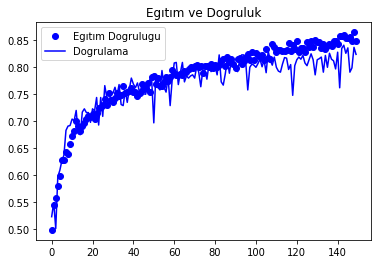

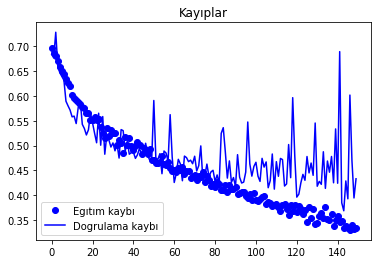

In [ ]:
#Egitim kaybini ve basarimini cizdirmek
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Egıtım Dogrulugu')
plt.plot(epochs, val_acc, 'b', label='Dogrulama ')
plt.title('Egıtım ve Dogruluk')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Egıtım kaybı')
plt.plot(epochs, val_loss, 'b', label='Dogrulama kaybı')
plt.title('Kayıplar')
plt.legend()

plt.show()

Goruludugu uzere model egitim ve dogrulama basrisinda ayri noktalara gitmiyor. Artik modelimiz daha iyi ogreniyor. Tabi ki daha buyuk ve cesitli bir veri seti ile daha iyi bir model egitebilirdik 